In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_Dec20_updated.csv


# US ACCIDENT DATA EXPLORATORY ANALYSIS
* US Accidents Exploratory Data Analysis
* TODO - talk about EDA
* TODO - talk about the dataset (source, what it contains, how it will be useful)



In [2]:
data_filename='/kaggle/input/us-accidents/US_Accidents_Dec20_updated.csv'

### Data Preparation and Cleaning
1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values 

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(data_filename)

In [5]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [7]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
len(newdf.columns)

14

**Percentage of missing values per column**

In [9]:
missing_percentages = df.isna().sum().sort_values(ascending = False)/ len(df)
missing_percentages

Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
Sunrise_Sunset           0.000055
Civil_Twilight           0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
City                     0.000055
Country                  0.000000
Give_Way                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Turning_Loop             0.000000
Traffic_Signal           0.000000
Traffic_Calming          0.000000
Stop                     0.000000
Station                  0.000000
Roundabout    

<AxesSubplot:>

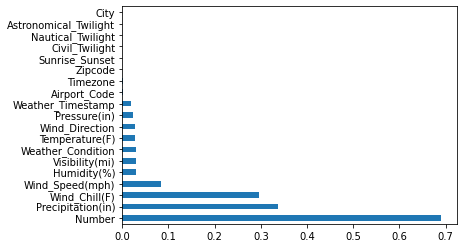

In [10]:
missing_percentages[missing_percentages != 0].plot(kind = 'barh')

**Remove columns that you dont want to use**

## Exploratory Analysis and Visualization

Columns we'll analyze:
1. City
2. Start Time
3. Start Lat, Start Lng
4. Temperature
5. Weather Condition

In [11]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [12]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3           Cincinnati
4                Akron
              ...     
1516059      Riverside
1516060      San Diego
1516061         Orange
1516062    Culver City
1516063       Highland
Name: City, Length: 1516064, dtype: object

In [13]:
cities = df.City.unique()
len(cities)

10658

In [14]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Los Angeles                     39984
Miami                           36233
Charlotte                       22203
Houston                         20843
Dallas                          19497
                                ...  
Manzanita                           1
West Brooklyn                       1
Garfield Heights                    1
Belding                             1
American Fork-Pleasant Grove        1
Name: City, Length: 10657, dtype: int64

In [15]:
cities_by_accident[:20]

Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
Sacramento      18431
Orlando         16169
Portland        14805
San Diego       14090
Minneapolis     12653
Atlanta         11854
Chicago         11507
Saint Paul      10084
Phoenix          9934
Raleigh          9516
San Jose         9362
Richmond         8472
Nashville        8381
Riverside        8201
Jacksonville     7815
Name: City, dtype: int64

<AxesSubplot:>

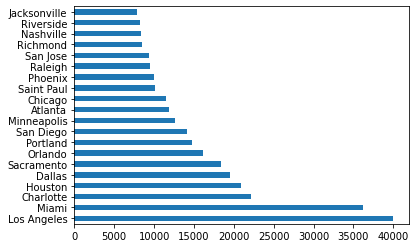

In [16]:
cities_by_accident[:20].plot(kind = 'barh')

In [17]:
import seaborn as sns
sns.set_style("darkgrid")

<AxesSubplot:xlabel='City', ylabel='Count'>

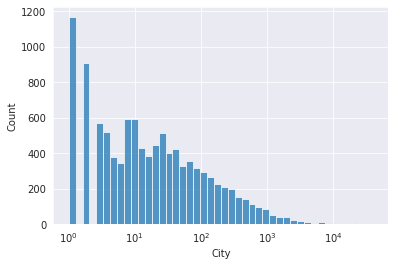

In [18]:
sns.histplot(cities_by_accident, log_scale=True)

In [19]:
cities_by_accident[cities_by_accident == 1]

South Paris                     1
Aberdeen Proving Ground         1
Rebecca                         1
Hiltons                         1
Jeanerette                      1
                               ..
Manzanita                       1
West Brooklyn                   1
Garfield Heights                1
Belding                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1167, dtype: int64

## Start Time

In [20]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

In [21]:
df.Start_Time = pd.to_datetime(df.Start_Time)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

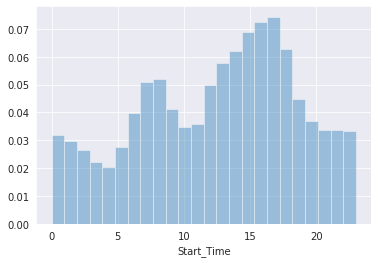

In [22]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

* A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work)
* Next higest percentage is 3 pm to 6 pm.

<AxesSubplot:xlabel='Start_Time'>

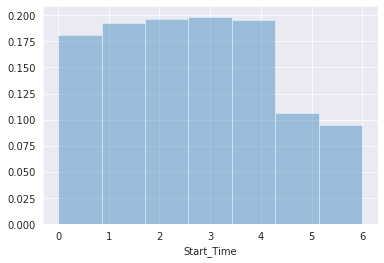

In [23]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

Is the distribution of accidents by hour the same on weekends as on weekdays?

<AxesSubplot:xlabel='Start_Time'>

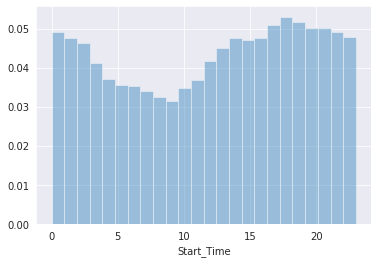

In [24]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

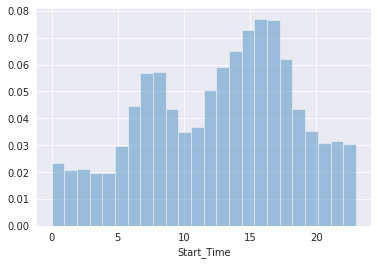

In [25]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

On Sundays, the peak occurs between 10 am and 3 pm, unlike weekdays

## Start Latitude & Longitude

In [26]:
df.Start_Lat

0          40.10891
1          39.86542
2          39.10266
3          39.10148
4          41.06213
             ...   
1516059    34.00248
1516060    32.76696
1516061    33.77545
1516062    33.99246
1516063    34.13393
Name: Start_Lat, Length: 1516064, dtype: float64

In [27]:
df.Start_Lng

0          -83.09286
1          -84.06280
2          -84.52468
3          -84.52341
4          -81.53784
             ...    
1516059   -117.37936
1516060   -117.14806
1516061   -117.84779
1516062   -118.40302
1516063   -117.23092
Name: Start_Lng, Length: 1516064, dtype: float64

In [28]:
sample_df = df.sample(int(0.1 * len(df)))

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

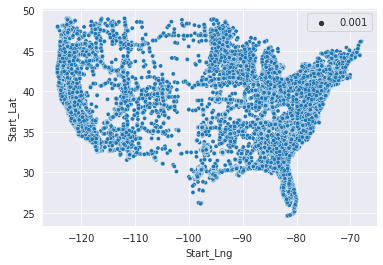

In [29]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [30]:
import folium

In [31]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(40.10891, -83.09286)

In [32]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

485542     40.748801
669951     39.697963
957395     37.786670
153658     37.632430
1220264    33.876919
             ...    
728082     44.878320
167756     38.019480
1219362    41.835180
1353350    32.663040
1454751    33.631760
Name: Start_Lat, Length: 100, dtype: float64
485542     -74.212488
669951     -84.218588
957395    -122.390200
153658    -122.437460
1220264   -118.152450
              ...    
728082    -121.429370
167756     -78.534200
1219362    -72.306640
1353350   -117.109380
1454751    -84.395440
Name: Start_Lng, Length: 100, dtype: float64


In [33]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [34]:
from folium.plugins import HeatMap

In [35]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [36]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## Questions:
1. Are accidents more in colder or warmer states?
2. Which 5 states have the highest number of accidents? How about per capita?
3. Does New York show up in the data? If yes, why is the count lower if this the most populated city.
4. Among the top 100 cities in number of accidents, which states do they belong to most frequently.
5. What time of the day are accidents most frequent in? - ANSWERED
6. Which days of the week have the most accidents?
7. Which months have the most accidents?
8. What is the trend of accidents year over year (decreasing/increasing?)
9. When is accidents per unit of traffic the highest.